# __TRABAJO FINAL DE MÁSTER - 14MBID__

Tema TFM: __Análisis de personalización de Menús en un Restaurante de Carnes a través del algoritmo Apriori__

Elaborado por: Jonathan Túquerres

## Importación de librerías necesarias

Se van a necesitar de las siguientes librerías:
- Pandas, para leer archivos tipo csv o excel.
- Numpy, librería para trabajar con funciones matemáticas.
- Seaborn, para crear gráficos estadísticos en  python.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [ ]:
version = !python --version
print("La versión de Python utilizada para el presente proyecto es", version)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La versión de Python utilizada para el presente proyecto es ['Python 3.10.12']


## Importación del data set

In [ ]:
# Lista de nombres de archivos a unir
NP1 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/23-1.010123-150123.xls')
NP2 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/23-2.160123-310123.xls')
NP3 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/24.010223-280223.xls')
NP4 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/25.010323-310323.xls')
NP5 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/26.010423-300423.xls')
NP6 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/27.010523-310523.xls')
NP7 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/28.010623-300623.xls')
NP8 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/29.010723-310723.xls')
NP9 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/30.010823-310823.xls')
NP10 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/31.010923-300923.xls')
NP11 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/32.011023-311023.xls')
NP12 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/33.011123-301123.xls')
NP13 = pd.read_excel('/content/drive/Othercomputers/Mi Portátil (1)/IQ/UNIVERSIDAD INTERNACIONAL DE VALENCIA/14MBID - TFM/TFM DATA/34.011223-311223.xls')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
NP1.columns = NP1.iloc[0]
NP2.columns = NP2.iloc[0]
NP3.columns = NP3.iloc[0]
NP4.columns = NP4.iloc[0]
NP5.columns = NP5.iloc[0]
NP6.columns = NP6.iloc[0]
NP7.columns = NP7.iloc[0]
NP8.columns = NP8.iloc[0]
NP9.columns = NP9.iloc[0]
NP10.columns = NP10.iloc[0]
NP11.columns = NP11.iloc[0]
NP12.columns = NP12.iloc[0]
NP13.columns = NP13.iloc[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataNP = pd.concat([NP1, NP2, NP3, NP4, NP5, NP6, NP7, NP8, NP9, NP10, NP11, NP12, NP13])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataNP = dataNP.drop(dataNP.index[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


## Normalización de datos

In [ ]:
# Asegúrate de que la columna 'Producto' es de tipo string
dataNP['Producto'] = dataNP['Producto'].astype(str)
dataNP['Tipo de Servicio'] = dataNP['Tipo de Servicio'].astype(str)


# Normaliza los caracteres en la columna 'Producto'
dataNP['Producto'] = dataNP['Producto'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
dataNP['Tipo de Servicio'] = dataNP['Tipo de Servicio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataNP.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Fecha,Caja,Usuario,Estado,Mozo,tItem,Producto,Cant.,Sub Total,...,Impuesto 2,Total,Fecha Envio,Envios,Documento,Canal Venta,Formas Pago,Grupo,Sub Grupo,Tipo de Servicio
1,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,001,MORO RISOTTO,1,5.983607,...,0.598361,7.3,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,ALIMENTOS,MENU,GUARNICIONES
2,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,002,PAPA RELLENA,1,4.098361,...,0.409836,5,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,ALIMENTOS,MENU,GUARNICIONES
3,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,003,SPRITE 400ML,1,1.885246,...,0.188525,2.3,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,BEBIDAS,NO ALCOHOLICAS,GASEOSAS
4,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,004,COCA COLA 500ML,1,1.885246,...,0.188525,2.3,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,BEBIDAS,NO ALCOHOLICAS,GASEOSAS
5,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,005,6052 MIX PARRILLERO P#3,1,2.254545,...,0.225455,2.48,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,ALIMENTOS,PARRILLA,EMBUTIDOS


In [ ]:
print("El número inicial de instancias y atributos es", dataNP.shape[0],"y", dataNP.shape[1], "respectivamente.")

El número inicial de instancias y atributos es 588757 y 21 respectivamente.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Con estos datos, se puede verificar inicialmente que es una base de datos de facturación, por lo que las columnas (atributos) corresponden a varios datos que son útiles para dar seguimiento a este cobro de artículos. Sin embargo, al tener conocimiento neto del data set otorgado por una empresa privada, se puede separar fácilmente los atributos e instancias potencialmente útiles para el fin que se espera, que es la puesta en marcha de un sistema de recomendación de alimentos del menú, como entradas, guarniciones, bebidas y otros.

## Missing values

A través de un mapa de calor, se puede corroborar en qué parte del dataset están los Missing Values. Se designa el color amarillo para Missing Values, y color café para los que no lo son.

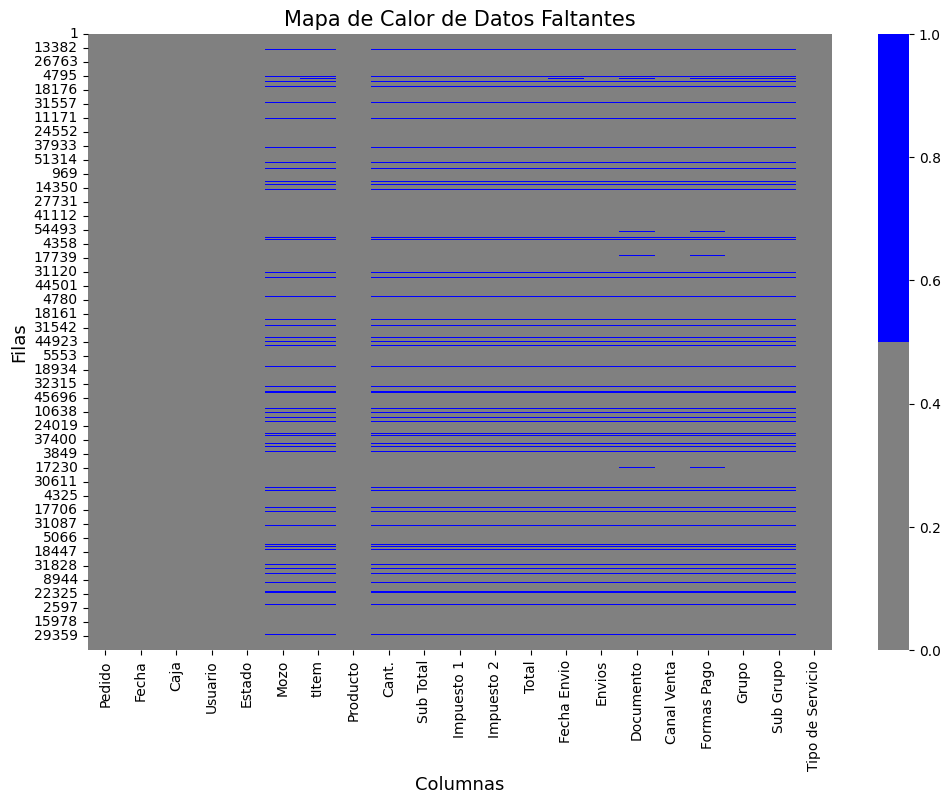

In [ ]:
# Definir los colores
colours = ['grey', 'blue']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12,8))

# Crear el mapa de calor
sns.heatmap(dataNP.isnull(), cmap=sns.color_palette(colours), ax=ax)

# Añadir un título
ax.set_title('Mapa de Calor de Datos Faltantes', fontsize=15)

# Añadir etiquetas a los ejes
ax.set_xlabel('Columnas', fontsize=13)
ax.set_ylabel('Filas', fontsize=13)

# Mostrar la gráfica
plt.show()

In [ ]:
# Calcula el número total de elementos en el DataFrame
total = dataNP.size

# Calcula el número de elementos faltantes en el DataFrame
missing = dataNP.isnull().sum().sum()

# Calcula el porcentaje de datos faltantes
porcentaje_faltante = round((missing / total) * 100,2)

print(f'El porcentaje de datos faltantes es: {porcentaje_faltante}%')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


El porcentaje de datos faltantes es: 6.28%


Con este gráfico se puede llegar a la conclusión de que los valores faltantes comienzan desde la columna 'MOZO', siendo lineal en su mayor parte, lo que indica un patrón. Para confirmar esto, solicita al programa que muestre los valores nulos en la columna mencionada anteriormente.

In [ ]:
dataNP[dataNP['Mozo'].isnull()].head(5)

,Pedido,Fecha,Caja,Usuario,Estado,Mozo,tItem,Producto,Cant.,Sub Total,...,Impuesto 2,Total,Fecha Envio,Envios,Documento,Canal Venta,Formas Pago,Grupo,Sub Grupo,Tipo de Servicio
8,Total Pedido :,32.873604,1.662295,3.28736,37.82326,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
19,Total Pedido :,72.928777,2.912178,7.185735,83.02669,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
32,Total Pedido :,63.973375,4.131148,6.397337,74.50186,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
39,Total Pedido :,33.281684,0.782319,3.274597,37.3386,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
51,Total Pedido :,36.524115,3.069145,3.59884,43.1921,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


Se puede verificar que existen al menos un dato en la columna 'Pedido' que está relacionada con los valores nulos en la columna 'Mozo' (Total Pedido:). Estas filas son valores de suma de cantidades de venta del producto, datos que no son de utilidad para  el fin que se está buscando, es por ello que se decide eliminar estas filas. Sin embargo, se corrobora esta hipótesis con el siguiente comando, que cuenta el número de instancias únicas de una columna especificada.

In [ ]:
null_dataNP = dataNP[dataNP['Mozo'].isnull()]
null_dataNP['Pedido'].value_counts()

Total Pedido :    54926
Total :              13
Name: Pedido, dtype: int64

Con esto se comprueba que efectivamente solo existen dos valores (repetidos) en la columna 'Pedido'. Luego se procede a la eliminación de este Missing Value, designando un nuevo Data Frame de nombre 'new_dataNP' para las modificaciones que se hagan desde este punto en adelante.

In [ ]:
new_dataNP = dataNP.dropna(subset=['Mozo'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Se vuelve a verificar a través de un mapa de calor los valores perdidos, esta vez del DataFrame 'new_dataNP', siguiendo el mismo patrón de colores del anterior, es decir, el color amarillo para Missing Values, y color café para los que no lo son.

In [ ]:
nulos_NP = new_dataNP.isnull().sum()

# Crea un nuevo DataFrame con los resultados
df_nulos = pd.DataFrame({'new_dataNP': nulos_NP})

print(df_nulos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                  new_dataNP
0                           
Pedido                     0
Fecha                      0
Caja                       0
Usuario                    0
Estado                     0
Mozo                       0
tItem                    733
Producto                   0
Cant.                      0
Sub Total                  0
Impuesto 1                 0
Impuesto 2                 0
Total                      0
Fecha Envio              792
Envios                     0
Documento               1980
Canal Venta                0
Formas Pago             2009
Grupo                    733
Sub Grupo                733
Tipo de Servicio           0


Se puede visualizar claramente que existe aún Missing Values en las columnas 'Documento' y en 'Formas Pago', por lo que se repite el procedimiento anterior.

In [ ]:
new_dataNP[new_dataNP['Documento'].isnull()].head(5)

,Pedido,Fecha,Caja,Usuario,Estado,Mozo,tItem,Producto,Cant.,Sub Total,...,Impuesto 2,Total,Fecha Envio,Envios,Documento,Canal Venta,Formas Pago,Grupo,Sub Grupo,Tipo de Servicio
681,2300000062,2023-01-01 17:58:00,006,NLEON,ANULADO,SIN MESERO,NaN,nan,0,0,...,0,0,NaN,0,NaN,En el Local,NaN,NaN,NaN,nan
2108,2300000194,2023-01-02 14:15:00,007,HVINCES,ANULADO,NICOLE CHICA,001,6042 PECHUGA FILETE 300G,0.3,3.144545,...,0.314455,3.459,2023-01-02 14:19:29,1,NaN,En el Local,NaN,ALIMENTOS,PARRILLA,POLLO
2109,2300000194,2023-01-02 14:15:00,007,HVINCES,ANULADO,NICOLE CHICA,002,6004 CHINCHULIN,1,4.427273,...,0.442727,4.87,2023-01-02 14:19:29,1,NaN,En el Local,NaN,ALIMENTOS,PARRILLA,RES
2110,2300000194,2023-01-02 14:15:00,007,HVINCES,ANULADO,NICOLE CHICA,006,6521 RIB EYE E/V DON EUGENIO NP,1.05,30.765,...,3.0765,33.8415,2023-01-02 14:25:45,1,NaN,En el Local,NaN,ALIMENTOS,PARRILLA,RES
2168,2300000200,2023-01-02 14:29:00,006,HVINCES,ANULADO,SIN MESERO,NaN,nan,0,0,...,0,0,NaN,0,NaN,En el Local,NaN,NaN,NaN,nan


Se puede deducir que existe una relación entre los pedidos anulados y los valores perdidos en la columna 'Documento' y 'Formas Pago'. Del mismo modo se decide eliminar estas filas, debido a que los pedidos anulados pueden distrorsionar la data para el entrenamiento que se requiere más adelante, pues estos productos podrían no ser la decisión final del cliente, e incluso, una equivocación al ingreso del pedido por parte del mesero encargado. A pesar ello, también se comprueba pidiendo al programa que muestre en un DataFrame, denominado 'null_new_dataNP', los datos vacíos de la columna 'Documento', para después solicitar cuántos valores existen por cada dato repetido en la base de datos en la columna 'Estado'.

In [ ]:
null_new_dataNP = new_dataNP[new_dataNP['Documento'].isnull()]

In [ ]:
null_new_dataNP['Estado'].value_counts()

ANULADO      1870
FACTURADO     110
Name: Estado, dtype: int64

De estos valores, se puede decir que:
*   El campo 'ANULADO' será desechado debido a lo mencionado anteriormente.
*   El campo 'FACTURADO' con Missing Values tienen una cantidad muy pequeña de valores, que se consideran descartables, debido a que constituyen menos del 1% del total de los valores, tal y como se muestra a continuación:






In [ ]:
total_values = int(new_dataNP.shape[0])
null_values_fac = int(null_new_dataNP['Estado'].value_counts()[1])
percent_fac = null_values_fac/total_values
print('Mientras que los Missing Values de "FACTURADO" con respecto al total es de %.6f%%'%percent_fac)

Mientras que los Missing Values de "FACTURADO" con respecto al total es de 0.000206%


Es por ello que se eliminan estas filas que contengan los datos mencionados anteriormente, con el siguiente comando:

In [ ]:
new_dataNP = dataNP.dropna(subset=['Documento'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Se constata de mejor manera los valores perdidos restantes a través del porcentaje de Missing Values, separados por columnas.

In [ ]:
for file in new_dataNP.columns:
    percent_missing = np.mean(new_dataNP[file].isnull())
    print('{} - {}%'.format(file, '%.6f%%'%percent_missing))

Pedido - 0.000000%%
Fecha - 0.000000%%
Caja - 0.000000%%
Usuario - 0.000000%%
Estado - 0.000000%%
Mozo - 0.000000%%
tItem - 0.000000%%
Producto - 0.000000%%
Cant. - 0.000000%%
Sub Total - 0.000000%%
Impuesto 1 - 0.000000%%
Impuesto 2 - 0.000000%%
Total - 0.000000%%
Fecha Envio - 0.000023%%
Envios - 0.000000%%
Documento - 0.000000%%
Canal Venta - 0.000000%%
Formas Pago - 0.000055%%
Grupo - 0.000000%%
Sub Grupo - 0.000000%%
Tipo de Servicio - 0.000000%%


De estos datos se puede rescatar que aún existen valores perdidos en 'Formas Pago' y 'Fecha Envio', aunque corresponde a menos de 1% del total de datos. Se hará una revisión para verificar de qué constan estos valores y si tienen alguna relación con valores que podrían ser descartados.

In [ ]:
null_fp_new_dataNP = new_dataNP[new_dataNP['Formas Pago'].isnull()]
#null_fp_new_dataNP.iloc[:, [4, 17, 20]]
null_fp_new_dataNP.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Fecha,Caja,Usuario,Estado,Mozo,tItem,Producto,Cant.,Sub Total,...,Impuesto 2,Total,Fecha Envio,Envios,Documento,Canal Venta,Formas Pago,Grupo,Sub Grupo,Tipo de Servicio
4105,2300000361,2023-01-02 20:31:00,008,JILLESCAS,FACTURADO,ANDREW GRANADOS,016,MADURO FRITO,1,2.213115,...,0.221311,2.7,2023-01-02 19:25:00,1,0001007000000032,En el Local,NaN,ALIMENTOS,MENU,ENTRADAS
4106,2300000361,2023-01-02 20:31:00,008,JILLESCAS,FACTURADO,ANDREW GRANADOS,017,PATACONES,1,3.52459,...,0.352459,4.3,2023-01-02 19:25:00,1,0001007000000032,En el Local,NaN,ALIMENTOS,MENU,ENTRADAS
4107,2300000361,2023-01-02 20:31:00,008,JILLESCAS,FACTURADO,ANDREW GRANADOS,018,EXTRA QUESO CRIOLLO,1,0.983607,...,0.098361,1.2,2023-01-02 19:25:00,1,0001007000000032,En el Local,NaN,ALIMENTOS,MENU,GUARNICIONES
22336,2300002063,2023-01-10 22:07:00,008,LSIRA,FACTURADO,IVAN MACIAS,003,6426 BIFE ANCHO NP RES,0.33,9.2994,...,0.92994,10.22934,2023-01-10 20:40:00,1,0001007000000033,En el Local,NaN,ALIMENTOS,PARRILLA,RES
28629,2300002635,2023-01-13 21:23:00,008,MSEGOVIA,FACTURADO,EMANUEL PETAO,001,6428 ROAST BEEF NP RES,0.4,10.469091,...,1.046909,11.516,2023-01-13 21:23:34,1,0001007000000035,En el Local,NaN,ALIMENTOS,PARRILLA,RES


In [ ]:
new_dataNP = new_dataNP.dropna(subset=['Formas Pago'])
new_dataNP = new_dataNP.dropna(subset=['Fecha Envio'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calcula el número total de elementos en el DataFrame
total = new_dataNP.size

# Calcula el número de elementos faltantes en el DataFrame
missing = new_dataNP.isnull().sum().sum()

# Calcula el porcentaje de datos faltantes
porcentaje_faltante = round((missing / total) * 100,2)

print(f'El porcentaje de datos faltantes es: {porcentaje_faltante}%')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


El porcentaje de datos faltantes es: 0.0%


## Transformación de los datos

Para esta sección se transforman los datos, de ser necesario. En este caso, se decide conservar solo la fecha de la columna 'Fecha' que consta del dato de la fecha y la hora del pedido. Esto para llevar trazabilidad de los pedidos y, posteriormente, tomar datos de volumen de ventas en fines de semana y días laborables. En primer lugar, se vuelve a nombrar a la columna que se va a separar.

In [ ]:
new_dataNP = new_dataNP.rename(columns={'Fecha': 'Fecha_hora'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Seguido a ello, se separan los términos para extraer solo el valor deseado.

In [ ]:
new_dataNP[['Fecha', 'Hora']] = new_dataNP['Fecha_hora'].str.split(' ', 1, expand=True)
new_dataNP.iloc[:, [1, 21, 22]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-61c5d6941e76>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  new_dataNP[['Fecha', 'Hora']] = new_dataNP['Fecha_hora'].str.split(' ', 1, expand=True)


,Fecha_hora,Fecha,Hora
1,2023-01-01 12:39:00,2023-01-01,12:39:00
2,2023-01-01 12:39:00,2023-01-01,12:39:00
3,2023-01-01 12:39:00,2023-01-01,12:39:00
4,2023-01-01 12:39:00,2023-01-01,12:39:00
5,2023-01-01 12:39:00,2023-01-01,12:39:00
...,...,...,...
42725,2023-12-31 17:08:00,2023-12-31,17:08:00
42726,2023-12-31 17:08:00,2023-12-31,17:08:00
42727,2023-12-31 17:08:00,2023-12-31,17:08:00
42729,2023-12-31 17:12:00,2023-12-31,17:12:00


Además de ello, se define el tipo de variable de la columna de 'Fecha' generada y 'Cant.' de la siguiente manera

In [ ]:
new_dataNP['Cant.'] = new_dataNP['Cant.'].astype(float)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP['Fecha'] = pd.to_datetime(new_dataNP['Fecha'], format='%Y-%m-%d')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convertir la columna a datetime
new_dataNP['Hora'] = pd.to_datetime(new_dataNP['Hora'])

# Formatear la hora al formato deseado (sin segundos)
new_dataNP['Hora'] = new_dataNP['Hora'].dt.strftime("%H:%M")

# Imprimir el DataFrame
new_dataNP.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Fecha_hora,Caja,Usuario,Estado,Mozo,tItem,Producto,Cant.,Sub Total,...,Fecha Envio,Envios,Documento,Canal Venta,Formas Pago,Grupo,Sub Grupo,Tipo de Servicio,Fecha,Hora
1,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,001,MORO RISOTTO,1.0,5.983607,...,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
2,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,002,PAPA RELLENA,1.0,4.098361,...,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
3,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,003,SPRITE 400ML,1.0,1.885246,...,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
4,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,004,COCA COLA 500ML,1.0,1.885246,...,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
5,2300000001,2023-01-01 12:39:00,008,JUANC SERRANO,FACTURADO,David Vera,005,6052 MIX PARRILLERO P#3,1.0,2.254545,...,2023-01-01 12:39:35,1,F001007000052246,En el Local,Visa,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,12:39


Seguido a esto se realiza el reemplazo de los items

In [ ]:
reemplazos = {
    'no usar 1046 BIFE ANC.PER.RES NP': '6426 BIFE ANCHO NP RES',
    '1049 PICANA RES NP': '6420 PICANA DE RES NP',
    'COCA COLA ZERO 500 ML': 'COCA COLA ZERO 410ML',
    '6042N PECHUGA FILETE 300G': '6042 PECHUGA FILETE 300G',
    'SHOT DE LIMON': 'SHOT LIMON',
    '4814RT LONGANIZA 450 GR': '4814 LONGANIZA 450 GR',
    '6524N TOMAHAWK STEAK NP R': '6524 TOMAHAWK STEAK NP RES',
    'STELLA DRAFT': 'STELLA DRAFT VASO',
    'no usar 1047 BIFE ANG.PER.RES NP': '6427 BIFE ANGOSTO NP RES',
    'TE DE MANZANILLA': 'INFUSION MANZANILLA',
    'PORC. DE AGUACATE': 'PORC. AGUACATE',
    '4771RT RANCHERO 450 GR': '4771 RANCHERO 450 GR',
    'TE DE MENTA': 'INFUSION MENTA',
    'PORC. MENESTRA LENTEJA': 'PORC MENEST LENTEJA',
    '6414 BIFE ANCHO PER. URU': '6414 BIFE ANCHO PER. URUG',
    '6414 BIFE ANCH. PERS URUG': '6414 BIFE ANCHO PER. URUG',
    'SPRITE 400ML': 'SPRITE 500ML',
    'CLUB VERDE': 'CLUB VERDE RETORNABLE',
    '4772 CHISTORRA 200 GR': 'CHISTORRA 250 GR',
    '5923 COLITA CUADRIL URUG': '7099 COLITA ANGUS URU RES',
    'DIABLO DARK RED 750 ML': 'DIABLO RB DARK RED 750 ML',
    'POSTRE TIRAMISU': 'TIRAMISU',
    'PROMO MOJITO MARACUYA 2X12': 'PROMO MOJITO MARACUYA 2X1',
    'PROMO MOJITO CUBANO 2X12': 'PROMO MOJITO CUBANO 2X1',
    'PROMO MOJITO FRUTOS ROJOS 2X12': 'PROMO MOJITO FRUTOS ROJOS 2X1',
    'PROMO MARGARITA 2X12': 'PROMO MARGARITA 2X1',
    'PROMO TEQUILA SUNRISE 2X12': 'PROMO TEQUILA SUNRISE 2X1',
    'PROMO MARGARITA MARACUYA 2X12': 'PROMO MARGARITA MARACUYA 2X1',
    'PROMO MARGARITA BLUE 2X12': 'PROMO MARGARITA BLUE 2X1',
    'PROMO GIN TONIC 2X12': 'PROMO GIN TONIC 2X1',
    'PROMO CAIPI MANGO 2X12': 'PROMO CAIPIRISIMA DE MANGO 2X1',
    'PROMO LONG ISLAND 2X12': 'PROMO LONG ISLAND 2X1',
    'PROMO LONG ISLAND BLUE 2X12': 'PROMO LONG ISLAND BLUE 2X1',
    'PROMO CUBA LIBRE 2X12': 'PROMO CUBA LIBRE 2X1',
    'PROMO WHISKY SOUR 2X12': 'PROMO RON SOUR 2X1',
    'PROMO GIN FRUTOS ROJOS 2X12': 'PROMO GIN TONIC FRUTOS ROJOS 2X1',
    'PROMO OREOCOCTEL 2X12': 'OREO COCTEL',
    'PROMO DAIQUIRI PINK 2X12': 'DAIQUIRI PINK',
    'PROMO FERNET 2X12': 'COCTEL FERNET',
    'PROMO DAIQUIR BLACK 2X12': 'DAIQUIRI BLACK',
    'PROMO CERVEZA NEGRA HOPFEN 4X15': 'PROMO BOT. 330ML CERVEZA NEGRA HOPFEN 3X15.99',
    'PROMO CERVEZA RUBIA HOPFEN 4X15': 'PROMO BOT. 330ML CERVEZA RUBIA HOPFEN 3X15.99'
}

new_dataNP['Producto'] = new_dataNP['Producto'].replace(reemplazos)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Identificación de variables

Los atributos que se van a eliminar como Estado, tItem, Fecha Envio, Envios, Documento, Formas Pago no reflejan información importante para realizar agrupaciones de pedidos, muchos de estos datos son de uso interno y corroboración, como es el caso de formas de pago, documento, envío de pedido a barra/cocina. Las columnas como Caja, Usuario, Estado, Mozo poseen datos del número de caja, nombre del cajero y mesero respectivamente, datos que no son relevantes para el fin que se plantea. Otros atributos de costo como Sub Total, Impuesto 1, Impuesto 2 tampoco dan un valor al objetivo que se persigue, aunque podrían ser relevantes para otro tipo de análisis. Para el caso particular de Canal Venta, que refleja si el cliente ha pedido para llevar o consumir en el local, se tomará en cuenta como pedido, debido a que ya sea para llevar o consumir, se debe hacer la misma recomendación al cliente; la diferencia sustancial de este tipo es el costo adicional que supone el 10% del servicio del local.

In [ ]:
new_dataNP = new_dataNP.drop(['Fecha_hora','Caja', 'Usuario', 'Estado', 'Mozo', 'tItem', 'Sub Total', 'Impuesto 1', 'Impuesto 2', 'Fecha Envio', 'Envios', 'Documento', 'Canal Venta', 'Formas Pago'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Producto,Cant.,Total,Grupo,Sub Grupo,Tipo de Servicio,Fecha,Hora
1,2300000001,MORO RISOTTO,1.0,7.3,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
2,2300000001,PAPA RELLENA,1.0,5,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
3,2300000001,SPRITE 500ML,1.0,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
4,2300000001,COCA COLA 500ML,1.0,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
5,2300000001,6052 MIX PARRILLERO P#3,1.0,2.48,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,12:39


Se verifica el contenido de la columna Grupo, y se filtra por "OTROS"

In [ ]:
new_dataNP = new_dataNP[new_dataNP['Grupo'] != 'OTROS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Obtiene los nombres únicos de todos los productos
nombres_unicos = new_dataNP['Producto'].unique()

# Filtra los nombres únicos que contienen 'KILO'
nombres_NP = [nombre for nombre in nombres_unicos if 'KILO' in nombre]

for nombre in nombres_NP:
    print(nombre)

KILO SALSA DE CHIMICHURRI
KILO SALSA DE QUESO
KILO SALSA DE ALBAHACA
KILO SALSA BBQ
KILO MENESTRA FREJOL NEGRO
KILO MENESTRA CANARIO
KILO MENESTRA LENTEJA
KILO VINAGRETA MIEL MOSTAZA
KILO VINAGRETA DE LA CASA
KILO SALSA DE AJI
KILO MENESTRA FREJOL AMARILLO
KILO SALSA PESTO


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP = new_dataNP[~new_dataNP['Producto'].str.contains('KILO')]
new_dataNP = new_dataNP[~new_dataNP['Producto'].str.contains('LITRO')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PARA REVISIÓN GRÁFICA 1

In [ ]:
new_dataNP.to_csv('data1.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PARA REVISIÓN GRAFICA 2

In [ ]:
new_dataNP = new_dataNP[new_dataNP['Sub Grupo'] != 'MENU EVENTO']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP = new_dataNP[new_dataNP['Sub Grupo'] != 'PROMO ALCOHOLICAS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP = new_dataNP[new_dataNP['Sub Grupo'] != 'MENU PROMO']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP = new_dataNP[new_dataNP['Sub Grupo'] != 'PROMO NO ALCOHOLICAS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP.to_csv('data2.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Se revisan las CORTESÍAS de la columna Tipo de Servicio

In [ ]:
new_dataNP = new_dataNP[new_dataNP['Tipo de Servicio'] != 'CORTESIA']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP = new_dataNP[new_dataNP['Tipo de Servicio'] != 'OTROS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP = new_dataNP[new_dataNP['Tipo de Servicio'] != 'DESAYUNOS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP = new_dataNP[~new_dataNP['Producto'].isin(['P.G#8 LOMO VINO AR. ALBA','P.G#2 POLLO S. DURAZNO','P.G#7 POLLO EN S. CHAMPI','P.G#5 POLLO S. ROMERO','SHOT CHELADA', 'SHOT LIMON', 'SHOT MICHELADA','SHOT FRUTA PICADA', 'SHOT DE SIROPE SIMPLE', 'ZUMO DE LIMON', 'SHOT SIROPE FRUTOS ROJOS'])]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
def remover_4_digitos(colProducto):
  prot_4 = r"^\d{4}"
  colProducto['Producto'] = colProducto['Producto'].str.replace(prot_4, '', regex=True)
  return colProducto

def remover_2_digitos(colProducto):
  prot_2 = r"^\d{2}"
  colProducto['Producto'] = colProducto['Producto'].str.replace(prot_2, '', regex=True)
  return colProducto

new_dataNP = remover_4_digitos(new_dataNP)
new_dataNP = remover_2_digitos(new_dataNP)

new_dataNP['Producto'] = new_dataNP['Producto'].str.lstrip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creando un diccionario con los nombres antiguos como claves y los nuevos nombres como valores
tipo_CorteBebida = {
    "MIX PARRILLERO P#3": "EMBUTIDOS Personal",
    "BIFE ANCHO NP RES": "RES Personal",
    "BIFE ANCHO NP CERDO": "CERDO Personal",
    "ARGENTINO X3": "EMBUTIDOS Personal",
    "PICANA DE RES NP": "RES Familiar",
    "PECHUGA FILETE 300G": "POLLO Personal",
    "ENTRANA FINA NP RES": "RES Personal",
    "TOMAHAWK CERDO NP": "CERDO Personal",
    "BONE NEW YORK STEAK 30": "RES Familiar",
    "MIX PARRILLERO P#2": "EMBUTIDOS Personal",
    "PECHUGA FINAS HIERB": "POLLO Personal",
    "BUTIFARRA 450 GR": "EMBUTIDOS Familiar",
    "CHULETA PARR. NP CERDO": "CERDO Personal",
    "BUTIFARRA X3": "EMBUTIDOS Personal",
    "COSTILLA ESP. CERDO NP": "CERDO Personal",
    "BIFE C/HUESO NP RES": "RES Personal",
    "PANCETA PER. NP CER": "CERDO Personal",
    "BIFE MARUCHA NP RES": "RES Personal",
    "TAPA MATAMBRE PE CE": "CERDO Personal",
    "CHINCHULIN": "RES Personal",
    "T-BONE DE NP RES": "RES Personal",
    "MIX PARRILLERO P#1": "EMBUTIDOS Familiar",
    "PECHITO DE NP CERDO": "CERDO Personal",
    "TOCINETA C/C NP CER": "CERDO Familiar",
    "MORCILLA X3": "EMBUTIDOS Personal",
    "BONE RIB EYE STEAK 30": "RES Familiar",
    "PIERNAS Y CAD. AHUM": "POLLO Personal",
    "ARGENTINO 450GR": "EMBUTIDOS Familiar",
    "BABY RIBS CERDO NP": "CERDO Familiar",
    "CHORIZO LIBANES": "EMBUTIDOS Familiar",
    "BIFE CHORIZO NP RES": "RES Familiar",
    "CRIOLLO 300 GR": "EMBUTIDOS Personal",
    "PECHUGA CANTONESA": "POLLO Personal",
    "CHISTORRA 250 GR": "EMBUTIDOS Personal",
    "TOCINETA SC CERD NP": "CERDO Familiar",
    "ARTESANAL X3": "EMBUTIDOS Personal",
    "TOCINETA S/C PER CE": "CERDO Personal",
    "CHORIZO JALAPENO": "EMBUTIDOS Familiar",
    "MATAMBRE CERDO NP": "CERDO Familiar",
    "LONGANIZA 450 GR": "EMBUTIDOS Familiar",
    "BUTIFARRA PAR 450GR": "EMBUTIDOS Familiar",
    "TOMAHAWK STEAK NP RES": "RES Familiar",
    "ARTESANAL X6": "EMBUTIDOS Familiar",
    "CHORIZO AL VINO": "EMBUTIDOS Familiar",
    "BIFE ANGOSTO NP RES": "RES Personal",
    "CUENCANO X3": "EMBUTIDOS Personal",
    "CUADRIL NP RES": "RES Familiar",
    "PANCETA CERDO NP": "CERDO Familiar",
    "ROAST BEEF NP RES": "RES Personal",
    "COLITA CUADRIL NP RES": "RES Familiar",
    "BIFE ANGOSTO NP CERDO": "CERDO Personal",
    "RIB EYE E/V DON EUGENIO NP": "RES Personal",
    "LOMO FINO RES+3 ARG": "EMBUTIDOS Personal",
    "CHORIZO ESPANOL": "EMBUTIDOS Familiar",
    "PICANA DE CERDO NP": "CERDO Familiar",
    "FALDA PARR. NP RES": "RES Familiar",
    "CUENCANO 450 GR": "EMBUTIDOS Familiar",
    "MORCILLA 450 GR": "EMBUTIDOS Familiar",
    "BRAZO CERDO AHUMADO": "CERDO Familiar",
    "BACK RIBS DE NP CER": "CERDO Familiar",
    "CERVECERO 450 GR": "EMBUTIDOS Familiar",
    "CHORIZO ALEMAN": "EMBUTIDOS Familiar",
    "ENTRANA NP RES": "RES Personal",
    "CHORIZO ITALIANO": "EMBUTIDOS Familiar",
    "TAPA MATAMBRE NP CE": "CERDO Familiar",
    "RANCHERO 450 GR": "EMBUTIDOS Familiar",
    "BEEF ARM STEAK NP RES": "RES Familiar",
    "PECHUGA CON MOSTAZA": "POLLO Personal",
    "TAPA DE ASADO RES NP": "RES Familiar",
    "SHORT RIBS SH NP RES": "RES Personal",
    "BOCADO REINA NP RES": "RES Personal",
    "COLITA CUADRIL CERDO NP": "CERDO Personal",
    "BACK RIB DE NP RES": "RES Personal",
    "TIRAS DE ASADO NP": "RES Familiar",
    "TAPA PARR. NP RES": "RES Personal",
    "LOMO PARR. NP CERDO": "CERDO Personal",
    "BIFE PULPA NP RES": "RES Personal",
    "BIFE PULPA CERDO": "CERDO Familiar",
    "BIFE ANCHO PER. URUG": "RES Personal",
    "BIFE ANG. PER. URUG": "RES Personal",
    "BONE NEW YORK STEAK 60": "RES Familiar",
    "BONE RIB EYE STEAK 60": "RES Familiar",
    "TOCINO E/V DE CERDO": "CERDO Familiar",
    "OSOBUCO E/V DON EUGENIO": "RES Personal",
    "BIFE ANCHO URUGUAYO": "RES Familiar",
    "TIRAS ASADO PER RES": "RES Personal",
    "LOMO CERDO + 3 CRIOLLO": "EMBUTIDOS Personal",
    "HANGERS STEAK": "RES Personal",
    "ASADO TIRA LOMO FINO": "RES Personal",
    "BONE RIB EYE STEAK 90": "RES Familiar",
    "LOMO FINO CERDO + 3 ARGENTINO": "CERDO Personal",
    "FILETE LOMO FINO CERDO": "CERDO Personal",
    "T-BONE STEAK 30": "RES Familiar",
    "T-BONE STEAK 60": "RES Familiar",
    "PICANA PER. RES NP": "RES Personal",
    "CHULETA S/C PER.NP": "CERDO Personal",
    "COSTILLA S/C PER.NP": "CERDO Personal",
    "COLITA ANGUS URU RES": "RES Familiar",
    "PICANA URU ANGUS RES": "RES Familiar",
    "FALDA PER. RES NP": "RES Personal",
    "PICANA PER URUGUAYA": "RES Personal",
    "BONE NEW YORK STEAK 90": "RES Familiar",
    "PIERNA PAVO AHUMADA": "POLLO Personal",
    "T-BONE STEAK 90": "RES Familiar",
    "PICANA USA ANGUS RES": "RES Familiar",
    "BABY RIBS PER CE NP": "CERDO Personal",
    "TOMAHAWK 30 DIAS": "RES Familiar",
    "COLITA USA ANGUS RE": "RES Familiar",
    "CUADRIL ANGUS RES": "RES Familiar",
    "RIB EYE ANGUS USA": "RES Familiar",
    "TOMAHAWK 60 DIAS": "RES Familiar",
    "JARRA SANGRIA": "SANGRIAS Familiar",
    "JARRA LIMONADA": "JUGOS Familiar",
    "JARRA NARANJA": "JUGOS Familiar",
    "VASO LIMONADA": "JUGOS Personal",
    "VASO NARANJA": "JUGOS Personal",
    "JUGO DE COCO": "JUGOS Personal",
    "JUGO DE MORA": "JUGOS Personal",
    "JUGO DE MARACUYA": "JUGOS Personal",
    "JUGO DE PINA": "JUGOS Personal",
    "JARRA CLERICOT": "SANGRIAS Familiar",
    "LIMONADA IMPERIAL": "JUGOS Personal",
    "MEDIA JARRA NARANJA": "JUGOS Personal",
    "MEDIA JARRA LIMONADA": "JUGOS Personal",
    "MEDIA JARRA SANGRIA": "SANGRIAS Personal",
    "LIMONADA HAWAIIAN": "JUGOS Personal",
    "MEDIA JARRA CLERICOT": "SANGRIAS Personal",
    "LIMONADA BLACKBERRY": "JUGOS Personal",
    "COPA SANGRIA": "SANGRIAS Personal",
    "COPA CLERICOT": "SANGRIAS Personal",
    "LIMONADA PEPINO": "JUGOS Personal"
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP["Tipo Corte"] = new_dataNP["Producto"].map(tipo_CorteBebida)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP.to_csv('data3.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Separación de vinos, bajativos y aperitivos

In [ ]:
tipo_vinos = ['VINO TINTO', 'VINO BLANCO', 'VINO ROSADO', 'ESPUMANTES']
data_vinos = new_dataNP[new_dataNP['Tipo de Servicio'].isin(tipo_vinos)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
data_vinos = data_vinos.drop_duplicates(subset=['Producto'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bajat_aperi = ['COCTELES', 'BEBIDA CALIENTE', 'POSTRES', 'LICORES']
data_bajat_aperi = new_dataNP[new_dataNP['Tipo de Servicio'].isin(bajat_aperi)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
data_bajat_aperi = data_bajat_aperi.drop_duplicates(subset=['Producto'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ELIMINACIÓN VINOS Y LICORES

In [ ]:
new_dataNP = new_dataNP[~new_dataNP['Tipo de Servicio'].isin(['COCTELES','VINO TINTO', 'VINO BLANCO', 'VINO ROSADO', 'ESPUMANTES', 'BEBIDA CALIENTE', 'POSTRES', 'LICORES'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


## Análisis de datos

In [ ]:
# Total de pedidos y productos
print(f"Número total de pedidos: {new_dataNP['Pedido'].nunique()}")
print(f"Número total de productos: {new_dataNP['Producto'].nunique()}")

Número total de pedidos: 52219
Número total de productos: 215


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Promedio de factura por mes

In [ ]:
# Convertir la columna 'Fecha' a datetime
new_dataNP['Fecha'] = pd.to_datetime(new_dataNP['Fecha'], format='%m/%d/%Y')

# Crear una nueva columna 'Mes' que contenga solo el mes y el año
new_dataNP['Mes'] = new_dataNP['Fecha'].dt.to_period('M')

# Agrupar por 'Mes' y 'Pedido', y calcular la suma de 'Total' para cada grupo
gasto_mensual = new_dataNP.groupby(['Mes', 'Pedido'])['Total'].sum()

# Calcular el promedio de gasto por factura mensualmente
promedio_gasto_mensual = gasto_mensual.groupby('Mes').mean()

print(promedio_gasto_mensual)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mes
2023-01    61.838319
2023-02    62.686636
2023-03    64.283002
2023-04    57.899288
2023-05    53.410531
2023-06    61.620920
2023-07    63.703584
2023-08    64.498980
2023-09    64.752206
2023-10    64.001539
2023-11    62.422970
2023-12    72.997599
Freq: M, Name: Total, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


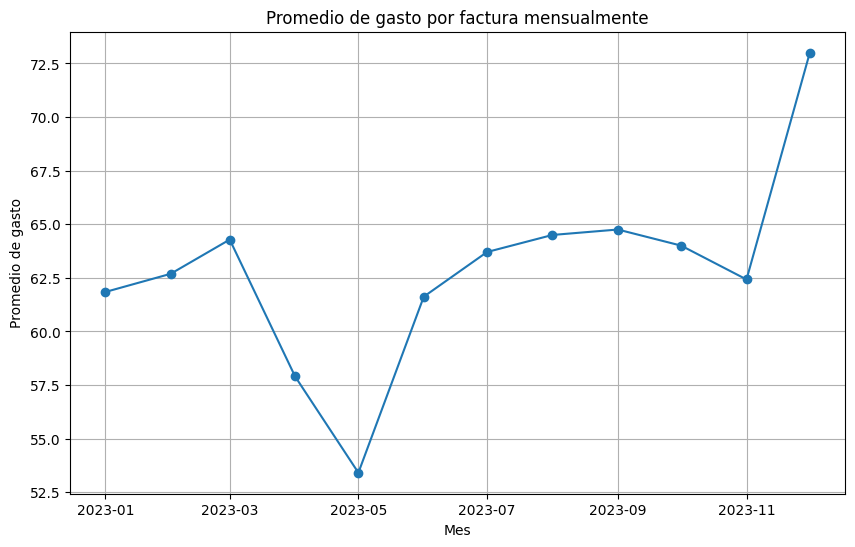

In [ ]:
# Convertir el índice 'Mes' a datetime para poder graficarlo
promedio_gasto_mensual.index = promedio_gasto_mensual.index.to_timestamp()

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(promedio_gasto_mensual, marker='o', linestyle='-')
plt.title('Promedio de gasto por factura mensualmente')
plt.xlabel('Mes')
plt.ylabel('Promedio de gasto')
plt.grid(True)
plt.show()

In [ ]:
# prompt: productos unicos por factura mensual

# Contar el número de productos únicos por pedido
productos_unicos_por_pedido = new_dataNP.groupby(['Mes', 'Pedido'])['Producto'].nunique()

# Calcular el promedio de productos únicos vendidos por pedido mensualmente
promedio_productos_unicos_mensual = productos_unicos_por_pedido.groupby('Mes').mean()

print(promedio_productos_unicos_mensual)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mes
2023-01    8.434754
2023-02    8.426790
2023-03    8.753519
2023-04    8.569489
2023-05    7.773285
2023-06    8.388798
2023-07    8.265152
2023-08    8.349662
2023-09    8.247458
2023-10    8.215299
2023-11    8.133378
2023-12    8.471652
Freq: M, Name: Producto, dtype: float64


En el gráfico anterior es complicado ver una separación de dos franjas que separe el año en dos semestres, es por ello que al organizarlos de mayor a menor, se puede dividir en meses mayor a 8.5 productos únicos por canasta y menor o igual a 8.5 productos por canasta. Es importante señalar que las reglas de asociación toma en consideración los productos únicos que llevan por canasta, mas no las cantidades de cada uno.

## SIN PERSONALIZACIÓN

En este data set, solo se separará los horarios establecidos anteriormente.

In [ ]:
new_dataNP_unicos = new_dataNP.drop_duplicates(subset=['Pedido', 'Producto'])
new_dataNP_unicos.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Producto,Cant.,Total,Grupo,Sub Grupo,Tipo de Servicio,Fecha,Hora
1,2300000001,MORO RISOTTO,1.0,7.3,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
2,2300000001,PAPA RELLENA,1.0,5,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
3,2300000001,SPRITE 500ML,1.0,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
4,2300000001,COCA COLA 500ML,1.0,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
5,2300000001,MIX PARRILLERO P#3,1.0,2.48,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,12:39


In [ ]:
sin_personalizacion_tarde = new_dataNP_unicos[new_dataNP_unicos['Hora'].between('12:00', '15:00')]
sin_personalizacion_mediatarde = new_dataNP_unicos[new_dataNP_unicos['Hora'].between('15:01', '18:00')]
sin_personalizacion_noche = new_dataNP_unicos[new_dataNP_unicos['Hora'].between('18:01', '22:00')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sin_personalizacion_tarde.to_csv('sin_personalizacion_tarde.csv', index = False)
sin_personalizacion_mediatarde.to_csv('sin_personalizacion_mediatarde.csv', index = False)
sin_personalizacion_noche.to_csv('sin_personalizacion_noche.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## PERSONALIZACIÓN NIVEL 1

Para el primer nivel de personalización, se combinarán los nombres de las proteínas con la columna "Tipo de servicio" añadiendo "Personal" o "Familiar", según el tipo de corte. Esta información se obtiene de registros de la empresa que se utilizan para realizar los pedidos en cuanto a las proteínas mencionadas. El data set tendrá como nombre new_dataNP3

### Reemplazos

In [ ]:
# Creando un diccionario con los nombres antiguos como claves y los nuevos nombres como valores
reemplazos_tipo_corte = {
    "MIX PARRILLERO P#3": "EMBUTIDOS Personal",
    "BIFE ANCHO NP RES": "RES Personal",
    "BIFE ANCHO NP CERDO": "CERDO Personal",
    "ARGENTINO X3": "EMBUTIDOS Personal",
    "PICANA DE RES NP": "RES Familiar",
    "PECHUGA FILETE 300G": "POLLO Personal",
    "ENTRANA FINA NP RES": "RES Personal",
    "TOMAHAWK CERDO NP": "CERDO Personal",
    "BONE NEW YORK STEAK 30": "RES Familiar",
    "MIX PARRILLERO P#2": "EMBUTIDOS Personal",
    "PECHUGA FINAS HIERB": "POLLO Personal",
    "BUTIFARRA 450 GR": "EMBUTIDOS Familiar",
    "CHULETA PARR. NP CERDO": "CERDO Personal",
    "BUTIFARRA X3": "EMBUTIDOS Personal",
    "COSTILLA ESP. CERDO NP": "CERDO Personal",
    "BIFE C/HUESO NP RES": "RES Personal",
    "PANCETA PER. NP CER": "CERDO Personal",
    "BIFE MARUCHA NP RES": "RES Personal",
    "TAPA MATAMBRE PE CE": "CERDO Personal",
    "CHINCHULIN": "RES Personal",
    "T-BONE DE NP RES": "RES Personal",
    "MIX PARRILLERO P#1": "EMBUTIDOS Familiar",
    "PECHITO DE NP CERDO": "CERDO Personal",
    "TOCINETA C/C NP CER": "CERDO Familiar",
    "MORCILLA X3": "EMBUTIDOS Personal",
    "BONE RIB EYE STEAK 30": "RES Familiar",
    "PIERNAS Y CAD. AHUM": "POLLO Personal",
    "ARGENTINO 450GR": "EMBUTIDOS Familiar",
    "BABY RIBS CERDO NP": "CERDO Familiar",
    "CHORIZO LIBANES": "EMBUTIDOS Familiar",
    "BIFE CHORIZO NP RES": "RES Familiar",
    "CRIOLLO 300 GR": "EMBUTIDOS Personal",
    "PECHUGA CANTONESA": "POLLO Personal",
    "CHISTORRA 250 GR": "EMBUTIDOS Personal",
    "TOCINETA SC CERD NP": "CERDO Familiar",
    "ARTESANAL X3": "EMBUTIDOS Personal",
    "TOCINETA S/C PER CE": "CERDO Personal",
    "CHORIZO JALAPENO": "EMBUTIDOS Familiar",
    "MATAMBRE CERDO NP": "CERDO Familiar",
    "LONGANIZA 450 GR": "EMBUTIDOS Familiar",
    "BUTIFARRA PAR 450GR": "EMBUTIDOS Familiar",
    "TOMAHAWK STEAK NP RES": "RES Familiar",
    "ARTESANAL X6": "EMBUTIDOS Familiar",
    "CHORIZO AL VINO": "EMBUTIDOS Familiar",
    "BIFE ANGOSTO NP RES": "RES Personal",
    "CUENCANO X3": "EMBUTIDOS Personal",
    "CUADRIL NP RES": "RES Familiar",
    "PANCETA CERDO NP": "CERDO Familiar",
    "ROAST BEEF NP RES": "RES Personal",
    "COLITA CUADRIL NP RES": "RES Familiar",
    "BIFE ANGOSTO NP CERDO": "CERDO Personal",
    "RIB EYE E/V DON EUGENIO NP": "RES Personal",
    "LOMO FINO RES+3 ARG": "EMBUTIDOS Personal",
    "CHORIZO ESPANOL": "EMBUTIDOS Familiar",
    "PICANA DE CERDO NP": "CERDO Familiar",
    "FALDA PARR. NP RES": "RES Familiar",
    "CUENCANO 450 GR": "EMBUTIDOS Familiar",
    "MORCILLA 450 GR": "EMBUTIDOS Familiar",
    "BRAZO CERDO AHUMADO": "CERDO Familiar",
    "BACK RIBS DE NP CER": "CERDO Familiar",
    "CERVECERO 450 GR": "EMBUTIDOS Familiar",
    "CHORIZO ALEMAN": "EMBUTIDOS Familiar",
    "ENTRANA NP RES": "RES Personal",
    "CHORIZO ITALIANO": "EMBUTIDOS Familiar",
    "TAPA MATAMBRE NP CE": "CERDO Familiar",
    "RANCHERO 450 GR": "EMBUTIDOS Familiar",
    "BEEF ARM STEAK NP RES": "RES Familiar",
    "PECHUGA CON MOSTAZA": "POLLO Personal",
    "TAPA DE ASADO RES NP": "RES Familiar",
    "SHORT RIBS SH NP RES": "RES Personal",
    "BOCADO REINA NP RES": "RES Personal",
    "COLITA CUADRIL CERDO NP": "CERDO Personal",
    "BACK RIB DE NP RES": "RES Personal",
    "TIRAS DE ASADO NP": "RES Familiar",
    "TAPA PARR. NP RES": "RES Personal",
    "LOMO PARR. NP CERDO": "CERDO Personal",
    "BIFE PULPA NP RES": "RES Personal",
    "BIFE PULPA CERDO": "CERDO Familiar",
    "BIFE ANCHO PER. URUG": "RES Personal",
    "BIFE ANG. PER. URUG": "RES Personal",
    "BONE NEW YORK STEAK 60": "RES Familiar",
    "BONE RIB EYE STEAK 60": "RES Familiar",
    "TOCINO E/V DE CERDO": "CERDO Familiar",
    "OSOBUCO E/V DON EUGENIO": "RES Personal",
    "BIFE ANCHO URUGUAYO": "RES Familiar",
    "TIRAS ASADO PER RES": "RES Personal",
    "LOMO CERDO + 3 CRIOLLO": "EMBUTIDOS Personal",
    "HANGERS STEAK": "RES Personal",
    "ASADO TIRA LOMO FINO": "RES Personal",
    "BONE RIB EYE STEAK 90": "RES Familiar",
    "LOMO FINO CERDO + 3 ARGENTINO": "CERDO Personal",
    "FILETE LOMO FINO CERDO": "CERDO Personal",
    "T-BONE STEAK 30": "RES Familiar",
    "T-BONE STEAK 60": "RES Familiar",
    "PICANA PER. RES NP": "RES Personal",
    "CHULETA S/C PER.NP": "CERDO Personal",
    "COSTILLA S/C PER.NP": "CERDO Personal",
    "COLITA ANGUS URU RES": "RES Familiar",
    "PICANA URU ANGUS RES": "RES Familiar",
    "FALDA PER. RES NP": "RES Personal",
    "PICANA PER URUGUAYA": "RES Personal",
    "BONE NEW YORK STEAK 90": "RES Familiar",
    "PIERNA PAVO AHUMADA": "POLLO Personal",
    "T-BONE STEAK 90": "RES Familiar",
    "PICANA USA ANGUS RES": "RES Familiar",
    "BABY RIBS PER CE NP": "CERDO Personal",
    "TOMAHAWK 30 DIAS": "RES Familiar",
    "COLITA USA ANGUS RE": "RES Familiar",
    "CUADRIL ANGUS RES": "RES Familiar",
    "RIB EYE ANGUS USA": "RES Familiar",
    "TOMAHAWK 60 DIAS": "RES Familiar"
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
reemplazos_tipo_bebida = {
    "JARRA SANGRIA": "SANGRIAS Familiar",
    "JARRA LIMONADA": "JUGOS Familiar",
    "JARRA NARANJA": "JUGOS Familiar",
    "VASO LIMONADA": "JUGOS Personal",
    "VASO NARANJA": "JUGOS Personal",
    "JUGO DE COCO": "JUGOS Personal",
    "JUGO DE MORA": "JUGOS Personal",
    "JUGO DE MARACUYA": "JUGOS Personal",
    "JUGO DE PINA": "JUGOS Personal",
    "JARRA CLERICOT": "SANGRIAS Familiar",
    "LIMONADA IMPERIAL": "JUGOS Personal",
    "MEDIA JARRA NARANJA": "JUGOS Personal",
    "MEDIA JARRA LIMONADA": "JUGOS Personal",
    "MEDIA JARRA SANGRIA": "SANGRIAS Personal",
    "LIMONADA HAWAIIAN": "JUGOS Personal",
    "MEDIA JARRA CLERICOT": "SANGRIAS Personal",
    "LIMONADA BLACKBERRY": "JUGOS Personal",
    "COPA SANGRIA": "SANGRIAS Personal",
    "COPA CLERICOT": "SANGRIAS Personal",
    "LIMONADA PEPINO": "JUGOS Personal"
}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP_lvl_1 = new_dataNP.copy()

def reemplazo_bebidas(row):
    if row['Tipo de Servicio'] in ['GASEOSAS', 'AGUAS', 'CERVEZAS']:
        return row['Tipo de Servicio']
    else:
        return row['Producto']

new_dataNP_lvl_1['Producto'] = new_dataNP_lvl_1.apply(reemplazo_bebidas, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
def reemplazo_aderezo1(row):
    if row['Tipo de Servicio'] in ['ADEREZOS']:
        return row['Tipo de Servicio']
    else:
        return row['Producto']

new_dataNP_lvl_1['Producto'] = new_dataNP_lvl_1.apply(reemplazo_aderezo1, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
# Reemplazando los nombres en el DataFrame copiado
new_dataNP_lvl_1['Producto'] = new_dataNP_lvl_1['Producto'].replace(reemplazos_tipo_corte)
new_dataNP_lvl_1['Producto'] = new_dataNP_lvl_1['Producto'].replace(reemplazos_tipo_bebida)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP_lvl_1.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Producto,Cant.,Total,Grupo,Sub Grupo,Tipo de Servicio,Fecha,Hora
1,2300000001,MORO RISOTTO,1.0,7.3,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
2,2300000001,PAPA RELLENA,1.0,5,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
3,2300000001,GASEOSAS,1.0,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
4,2300000001,GASEOSAS,1.0,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
5,2300000001,EMBUTIDOS Personal,1.0,2.48,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,12:39


In [ ]:
new_dataNP_lvl_1_unicos = new_dataNP_lvl_1.drop_duplicates(subset=['Pedido', 'Producto'])
new_dataNP_lvl_1_unicos.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Producto,Cant.,Total,Grupo,Sub Grupo,Tipo de Servicio,Fecha,Hora
1,2300000001,MORO RISOTTO,1.00,7.3,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
2,2300000001,PAPA RELLENA,1.00,5,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
3,2300000001,GASEOSAS,1.00,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
5,2300000001,MIX PARRILLERO P#3,1.00,2.48,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,12:39
6,2300000001,BIFE ANCHO NP RES,0.46,14.25908,ALIMENTOS,PARRILLA,RES,2023-01-01,12:39


In [ ]:
personalizacion_1_tarde = new_dataNP_lvl_1_unicos[new_dataNP_lvl_1_unicos['Hora'].between('12:00', '15:00')]
personalizacion_1_mediatarde = new_dataNP_lvl_1_unicos[new_dataNP_lvl_1_unicos['Hora'].between('15:01', '18:00')]
personalizacion_1_noche = new_dataNP_lvl_1_unicos[new_dataNP_lvl_1_unicos['Hora'].between('18:01', '22:00')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
personalizacion_1_tarde.to_csv('personalizacion_1_tarde.csv', index = False)
personalizacion_1_mediatarde.to_csv('personalizacion_1_mediatarde.csv', index = False)
personalizacion_1_noche.to_csv('personalizacion_1_noche.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## PERSONALIZACIÓN NIVEL 2

Crear una copia del original para trabajar. Esta se llamará new_dataNP3

### Reemplazos

In [ ]:
# Creando una copia del DataFrame original
new_dataNP_lvl_2 = new_dataNP.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Función para aplicar reemplazos
def reemplazar_o_copiar(row):
    if row['Sub Grupo'] == 'PARRILLA' and row['Producto'] in reemplazos_tipo_corte:
        return reemplazos_tipo_corte[row['Producto']]
    else:
        return row['Tipo de Servicio']

# Creando nueva columna
new_dataNP_lvl_2['Producto'] = new_dataNP_lvl_2.apply(reemplazar_o_copiar, axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
new_dataNP_lvl_2_unicos = new_dataNP_lvl_2.drop_duplicates(subset=['Pedido', 'Producto'])
new_dataNP_lvl_2_unicos.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Producto,Cant.,Total,Grupo,Sub Grupo,Tipo de Servicio,Fecha,Hora
1,2300000001,GUARNICIONES,1.00,7.3,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
3,2300000001,GASEOSAS,1.00,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
5,2300000001,EMBUTIDOS Personal,1.00,2.48,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,12:39
6,2300000001,RES Personal,0.46,14.25908,ALIMENTOS,PARRILLA,RES,2023-01-01,12:39
7,2300000001,CERDO Personal,0.22,4.18418,ALIMENTOS,PARRILLA,CERDO,2023-01-01,12:39


In [ ]:
personalizacion_2_tarde = new_dataNP_lvl_2_unicos[new_dataNP_lvl_2_unicos['Hora'].between('12:00', '15:00')]
personalizacion_2_mediatarde = new_dataNP_lvl_2_unicos[new_dataNP_lvl_2_unicos['Hora'].between('15:01', '18:00')]
personalizacion_2_noche = new_dataNP_lvl_2_unicos[new_dataNP_lvl_2_unicos['Hora'].between('18:01', '22:00')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
personalizacion_2_tarde.to_csv('personalizacion_2_tarde.csv', index = False)
personalizacion_2_mediatarde.to_csv('personalizacion_2_mediatarde.csv', index = False)
personalizacion_2_noche.to_csv('personalizacion_2_noche.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## PERSONALIZACIÓN NIVEL 3

Crear una copia del original para trabajar. Esta se llamará new_data2

### Reemplazos

In [ ]:
# Reemplazo PARRILLA
new_dataNP_lvl_3 = new_dataNP.copy()

def reemplazo_parrilla(row):
    if row['Tipo de Servicio'] in ['RES', 'CERDO', 'POLLO', 'EMBUTIDOS']:
        return row['Tipo de Servicio']
    else:
        return row['Producto']

new_dataNP_lvl_3['Producto'] = new_dataNP_lvl_3.apply(reemplazo_parrilla, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
# Reemplazo BEBIDAS
def reemplazo_bebidas(row):
    if row['Tipo de Servicio'] in ['GASEOSAS', 'AGUAS', 'CERVEZAS']:
        return row['Tipo de Servicio']
    else:
        return row['Producto']

new_dataNP_lvl_3['Producto'] = new_dataNP_lvl_3.apply(reemplazo_bebidas, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
# Reemplazo ADEREZOS
def reemplazo_aderezos(row):
    if row['Tipo de Servicio'] in ['ADEREZOS']:
        return row['Tipo de Servicio']
    else:
        return row['Producto']

new_dataNP_lvl_3['Producto'] = new_dataNP_lvl_3.apply(reemplazo_aderezos, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
new_dataNP_lvl_3['Producto'] = new_dataNP_lvl_3['Producto'].replace(reemplazos_tipo_bebida)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_dataNP_lvl_3_unicos = new_dataNP_lvl_3.drop_duplicates(subset=['Pedido', 'Producto'])
new_dataNP_lvl_3_unicos.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pedido,Producto,Cant.,Total,Grupo,Sub Grupo,Tipo de Servicio,Fecha,Hora
1,2300000001,MORO RISOTTO,1.00,7.3,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
2,2300000001,PAPA RELLENA,1.00,5,ALIMENTOS,MENU,GUARNICIONES,2023-01-01,12:39
3,2300000001,GASEOSAS,1.00,2.3,BEBIDAS,NO ALCOHOLICAS,GASEOSAS,2023-01-01,12:39
5,2300000001,EMBUTIDOS,1.00,2.48,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,12:39
6,2300000001,RES,0.46,14.25908,ALIMENTOS,PARRILLA,RES,2023-01-01,12:39
7,2300000001,CERDO,0.22,4.18418,ALIMENTOS,PARRILLA,CERDO,2023-01-01,12:39
9,2300000002,EMBUTIDOS,1.00,2.82,ALIMENTOS,PARRILLA,EMBUTIDOS,2023-01-01,13:28
10,2300000002,CERDO,0.31,5.89589,ALIMENTOS,PARRILLA,CERDO,2023-01-01,13:28
11,2300000002,RES,1.16,44.8108,ALIMENTOS,PARRILLA,RES,2023-01-01,13:28
12,2300000002,ENSALADA DE LA CASA,1.00,5,ALIMENTOS,MENU,ENSALADAS,2023-01-01,13:28


In [ ]:
personalizacion_3_tarde = new_dataNP_lvl_3_unicos[new_dataNP_lvl_3_unicos['Hora'].between('12:00', '15:00')]
personalizacion_3_mediatarde = new_dataNP_lvl_3_unicos[new_dataNP_lvl_3_unicos['Hora'].between('15:01', '18:00')]
personalizacion_3_noche = new_dataNP_lvl_3_unicos[new_dataNP_lvl_3_unicos['Hora'].between('18:01', '22:00')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
personalizacion_3_tarde.to_csv('personalizacion_3_tarde.csv', index = False)
personalizacion_3_mediatarde.to_csv('personalizacion_3_mediatarde.csv', index = False)
personalizacion_3_noche.to_csv('personalizacion_3_noche.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
